# Stroke Risk Prediction using Linear Regression
This notebook implements a **Linear Regression** model with **Gradient Descent** to predict stroke risk.

Since Age is the only feature thats not binary and its messing a lot with linear regression model. So i have made a file in which you can make it binary based on the limit you want to set.
For now i have set age > 50

We will:
- Load and preprocess the dataset
- Normalize the features
- Implement **Gradient Descent** with **L2 Regularization**
- Evaluate the model and check for overfitting


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Load Dataset
We load the stroke risk dataset and extract features and target variables.

In [2]:
# Load dataset
df = pd.read_csv("updated_stroke_risk_dataset.csv")
print (df)
# Prepare features and target variable
X = df.drop(columns=["Stroke Risk (%)", "At Risk (Binary)", "Age"]).values  # Feature matrix
y = df["Stroke Risk (%)"].values.reshape(-1, 1)  # Target variable

       Chest Pain  Shortness of Breath  Irregular Heartbeat  \
0               0                    1                    1   
1               0                    0                    1   
2               1                    0                    0   
3               1                    0                    1   
4               0                    0                    1   
...           ...                  ...                  ...   
69995           1                    0                    0   
69996           0                    0                    0   
69997           1                    1                    0   
69998           0                    1                    1   
69999           0                    1                    0   

       Fatigue & Weakness  Dizziness  Swelling (Edema)  \
0                       1          0                 0   
1                       0          0                 1   
2                       1          1                 1   
3          

In [3]:
X

array([[0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 1]], shape=(70000, 16))

## 2. Feature Normalization
We normalize the features to have **zero mean** and **unit variance** for better convergence.

In [4]:
# Feature normalization
mu = np.mean(X, axis=0)  # Compute mean
sigma = np.std(X, axis=0)  # Compute standard deviation
sigma = np.where(sigma == 0, 1, sigma)  # Prevent division by zero
lambda_ = 0.05  # Regularization parameter

X = (X - mu) / sigma  # Normalize features

# Add intercept term (column of ones)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term

## 3. Split Dataset
We split the data into **training (80%)** and **testing (20%)** sets.

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Initialize Model Parameters
We initialize **theta (weights)** to zeros and set hyperparameters.

In [6]:
# Initialize parameters (Theta)
theta = np.zeros((X_train.shape[1], 1))  # Initialize theta to zeros

# Hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

## 5. Compute Cost Function
We define the **Mean Squared Error (MSE)** cost function.

In [7]:
# Compute Cost Function
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = X @ theta  # Hypothesis function (h = Xθ)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # Compute cost
    return cost

## 6. Implement Gradient Descent
We update **theta** iteratively to minimize the cost function.

In [8]:
# Gradient Descent Algorithm
def gradient_descent(X, y, theta, alpha, iterations, lambda_):
    m = len(y)  # Number of training examples
    cost_history = []  # Store cost at each iteration

    for i in range(iterations):
        gradient = (1 / m) * (X.T @ (X @ theta - y)) + (lambda_ / m) * theta  
        theta -= alpha * gradient  # Update theta
        cost = compute_cost(X, y, theta) + (lambda_ / (2 * m)) * np.sum(theta**2)  # Compute cost
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
    
    return theta, cost_history

## 7. Train the Model

In [9]:
# Run gradient descent
theta_final, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations, lambda_)

Iteration 0: Cost 1612.8332
Iteration 100: Cost 228.9163
Iteration 200: Cost 43.2569
Iteration 300: Cost 18.3417
Iteration 400: Cost 14.9970
Iteration 500: Cost 14.5479
Iteration 600: Cost 14.4875
Iteration 700: Cost 14.4794
Iteration 800: Cost 14.4783
Iteration 900: Cost 14.4782


## 8. Evaluate Model Performance

In [10]:
# Predictions for training and test data
y_train_pred = X_train @ theta_final
y_test_pred = X_test @ theta_final

# Compute Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Convert RMSE to percentage relative to 100% scale
train_error_percentage = (train_rmse / 100) * 100
test_error_percentage = (test_rmse / 100) * 100

# Print errors as percentages
print(f"Training Error: {train_error_percentage:.2f}%")
print(f"Test Error: {test_error_percentage:.2f}%")

Training Error: 5.38%
Test Error: 5.37%


In [11]:
# Display original vs. predicted values for the last 5 test samples
print("\nOriginal Value | Predicted Value")
print("--------------------------------")
for i in range(0, 5):  # Last 5 values
    print(f"{y_test[i][0]:.2f}          | {y_test_pred[i][0]:.2f}")



Original Value | Predicted Value
--------------------------------
68.50          | 72.50
45.00          | 37.91
35.00          | 37.67
40.00          | 48.01
67.50          | 66.27


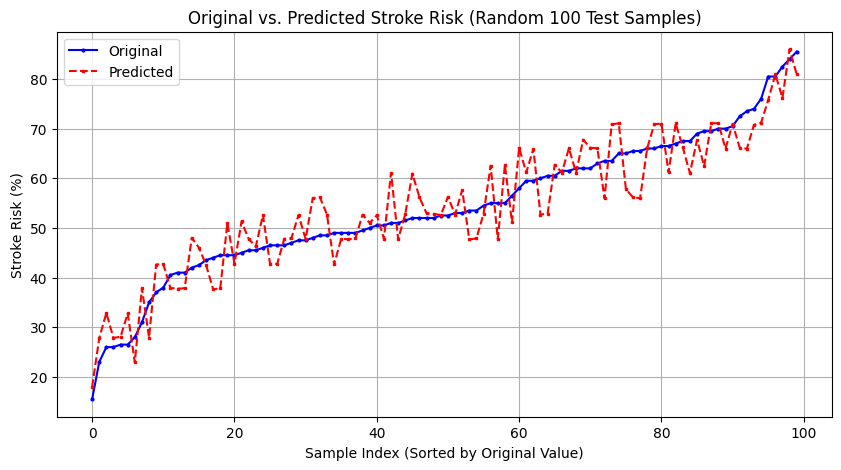

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten arrays for easier manipulation
y_test_flat = y_test.flatten()
y_test_pred_flat = y_test_pred.flatten()

# Randomly select 100 indices
random_indices = np.random.choice(len(y_test_flat), 100, replace=False)

# Get the corresponding values
y_test_sample = y_test_flat[random_indices]
y_test_pred_sample = y_test_pred_flat[random_indices]

# Sort values for better visualization
sorted_indices = np.argsort(y_test_sample)
y_test_sorted = y_test_sample[sorted_indices]
y_test_pred_sorted = y_test_pred_sample[sorted_indices]

# Plot the selected samples
plt.figure(figsize=(10, 5))
plt.plot(y_test_sorted, label="Original", linestyle="-", marker="o", markersize=2, color="blue")
plt.plot(y_test_pred_sorted, label="Predicted", linestyle="--", marker="s", markersize=2, color="red")

# Labels and legend
plt.xlabel("Sample Index (Sorted by Original Value)")
plt.ylabel("Stroke Risk (%)")
plt.title("Original vs. Predicted Stroke Risk (Random 100 Test Samples)")
plt.legend()
plt.grid(True)

plt.show()


# Try yourself ;)

In [22]:
# Input your sym
chest_pain = 0
shortness_of_breath = 0
irregular_heartbeat = 1
fatigue_weakness = 0
dizziness = 1
swelling_edema = 0
pain_neck_jaw_shoulder_back = 1
excessive_sweating = 0
persistent_cough = 1
nausea_vomiting = 0
high_blood_pressure = 1
chest_discomfort_activity = 0
cold_hands_feet = 1
snoring_sleep_apnea = 0
anxiety_feeling_of_doom = 1
age_greater_than_50 = 1

# Store them in an array in the original order
user_input = [
    chest_pain, shortness_of_breath, irregular_heartbeat, fatigue_weakness,
    dizziness, swelling_edema, pain_neck_jaw_shoulder_back, excessive_sweating,
    persistent_cough, nausea_vomiting, high_blood_pressure, chest_discomfort_activity,
    cold_hands_feet, snoring_sleep_apnea, anxiety_feeling_of_doom, age_greater_than_50
]


# Convert to NumPy array
new_input = np.array([user_input])

# Normalize input using training data statistics
mu = np.array([0.5] * 16)  # Placeholder mean values (Replace with actual means)
sigma = np.array([0.2] * 16)  # Placeholder std values (Replace with actual std)

# Prevent division by zero
sigma = np.where(sigma == 0, 1, sigma)

# Apply normalization
new_input = (new_input - mu) / sigma

# Add bias term (intercept)
new_input = np.c_[np.ones((new_input.shape[0], 1)), new_input]  # Add column of 1s for bias

# Compute prediction using trained theta values
y_pred = new_input @ theta_final  # Dot product with trained theta values

# Display result
print(f"Predicted Stroke Risk: {y_pred[0][0]:.2f}%")

Predicted Stroke Risk: 71.84%
